In [ ]:
%pip install seaborn
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Split data into a training and testing dataset
Due to the fact that the data is both already sorted by user and time, we will need to 'unsort' to gain a proper random sampling 

Steps 
    1) 'Unsort' and 'shuffle' data
    2) develop 2 files that are accurate random samplings of data 
    3) ensure files are random samplings of data

In [ ]:
dataset = pd.read_csv("./geophone/geophone-sensor-data.csv")

dataset_sorted = dataset.sort_values(by=["name", "timestamp"], ascending=[True, True])

In [ ]:
og = sns.FacetGrid(dataset_sorted)
og.map(plt.hist, 'mean', bins=20)

og.set_axis_labels("Mean", "Frequency")
og.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
og.figure.suptitle("Distribution of Mean")

In [ ]:
train, test = train_test_split(dataset_sorted, test_size=0.5, random_state=42, shuffle=True)
print(train.head())
print('_'*40)
print(test.head())

In [ ]:
train_g = sns.FacetGrid(train)
train_g.map(plt.hist, 'mean', bins=20)
train_g.set_axis_labels("Mean", "Frequency")
train_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
train_g.figure.suptitle("Distribution of Training Mean")


In [ ]:
test_g = sns.FacetGrid(test)
test_g.map(plt.hist, 'mean', bins=20)

test_g.set_axis_labels("Mean", "Frequency")
test_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
test_g.figure.suptitle("Distribution of Test Mean")


Cannot use person as a afeature due to below inconsistencies. We have to look at the data holistically. 

Test if there are outliers or noise in the data 

Binning and standardizing

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.hist, 'energy', alpha=.5, bins=20)
grid.add_legend();


In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'dominant_freq', 'activity', alpha=.5)
grid.add_legend();


In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.triplot, 'min', 'max', alpha=.5)
grid.add_legend();


In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.ecdf, 'max', alpha=.5)
grid.map(plt.ecdf, 'min', alpha=.5, color='red')
grid.map(plt.ecdf, 'mean', alpha=.5, color='green')
grid.add_legend();


In [ ]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
# grid.map(plt.plot('timestamp', max, label='Max Value', color='blue'))
# grid.map(plt.plot('timestamp', min, label='Min Value', color='red'))

# Add titles and labels for clarity
# plt.title('Max and Min Values Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()

In [ ]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

In [ ]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

In [ ]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_emir = train[train['name'] == 'Emir']

# 3. Create FacetGrid using the filtered data
#    - Removed 'col='name'' because only 'emir' remains.
#    - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_emir, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

In [ ]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_yusuf = train[train['name'] == 'Yusuf']

# 3. Create FacetGrid using the filtered data
#    - Removed 'col='name'' because only 'emir' remains.
#    - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_yusuf, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

In [ ]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_enes = train[train['name'] == 'Enes']

# 3. Create FacetGrid using the filtered data
#    - Removed 'col='name'' because only 'emir' remains.
#    - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_enes, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

In [ ]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_furkan = train[train['name'] == 'Furkan']

# 3. Create FacetGrid using the filtered data
#    - Removed 'col='name'' because only 'emir' remains.
#    - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_furkan, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

In [ ]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_alihan = train[train['name'] == 'Alihan']

# 3. Create FacetGrid using the filtered data
#    - Removed 'col='name'' because only 'emir' remains.
#    - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_alihan, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

In [26]:
# ====================================================================
# --- 1) Feature Generation: Relation between Mean and Movement ---
# ====================================================================

# The "movement" or "variability" can be captured by the difference between max and min,
# which represents the total range of the sensor reading for that timestamp.

# Feature 1: Range (Max - Min)
train['range'] = train['max'] - train['min']
# test['range'] = test['max'] - test['min'] # NOTE: Apply to test set if you need it for modeling later

# Feature 2: Mean-to-Range Ratio (Measures where the mean sits within the range)
# A small ratio means the mean is close to the min; a large ratio means it's close to the max.
# This might capture asymmetry in the sensor readings.
# To avoid division by zero, we use np.where to handle cases where range is 0.
train['mean_to_range_ratio'] = np.where(
    train['range'] != 0,
    (train['mean'] - train['min']) / train['range'],
    0.5  # Assign a neutral value (0.5) if range is zero
)
# test['mean_to_range_ratio'] = np.where( ... ) # Apply to test set if needed

print("\n" + "="*50)
print("FEATURE GENERATION COMPLETE - New columns added: 'range' and 'mean_to_range_ratio'")
print("Head of the training data with new features:")
print(train[['mean', 'min', 'max', 'range', 'mean_to_range_ratio']].head())


FEATURE GENERATION COMPLETE - New columns added: 'range' and 'mean_to_range_ratio'
Head of the training data with new features:
             mean   min   max  range  mean_to_range_ratio
1710  2037.283333  2033  2041      8             0.535417
874   2039.936000  2007  2075     68             0.484353
1252  2042.155333  2037  2048     11             0.468667
1345  2041.374000  2035  2047     12             0.531167
873   2039.518667  2018  2055     37             0.581586


In [27]:
# ====================================================================
# --- 2) Strip Out Useless Info ---
# ====================================================================

# Based on a typical sensor dataset and your known requirements ('max', 'min', 'mean', 'activity'/'type'),
# and the observation that 'person'/'name' is inconsistent, we can define the required columns.

# Columns to keep for modeling/analysis (including the new features)
KEEP_COLUMNS = ['max', 'min', 'mean', 'range', 'mean_to_range_ratio', 'activity', 'name']

# Apply the filter to keep only the necessary columns
train_processed = train[KEEP_COLUMNS].copy()
# test_processed = test[KEEP_COLUMNS].copy() # Apply to test set

print("\n" + "="*50)
print("DATA CLEANUP COMPLETE - Remaining columns:")
print(train_processed.info())


DATA CLEANUP COMPLETE - Remaining columns:
<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 1710 to 286
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   max                  900 non-null    int64  
 1   min                  900 non-null    int64  
 2   mean                 900 non-null    float64
 3   range                900 non-null    int64  
 4   mean_to_range_ratio  900 non-null    float64
 5   activity             900 non-null    object 
 6   name                 900 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 56.2+ KB
None


Display data in graphs 

?????????

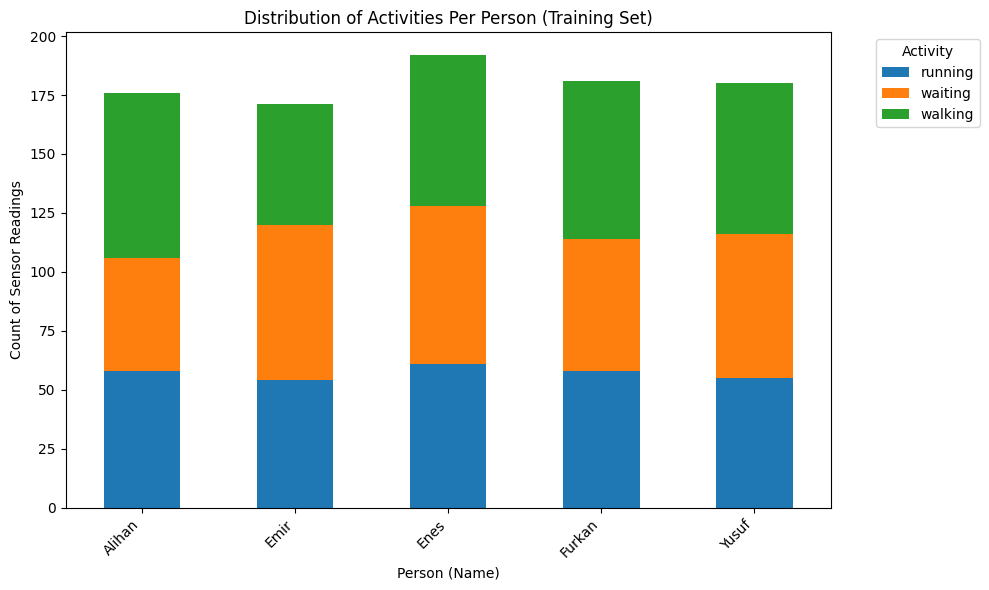

C:\Users\azind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


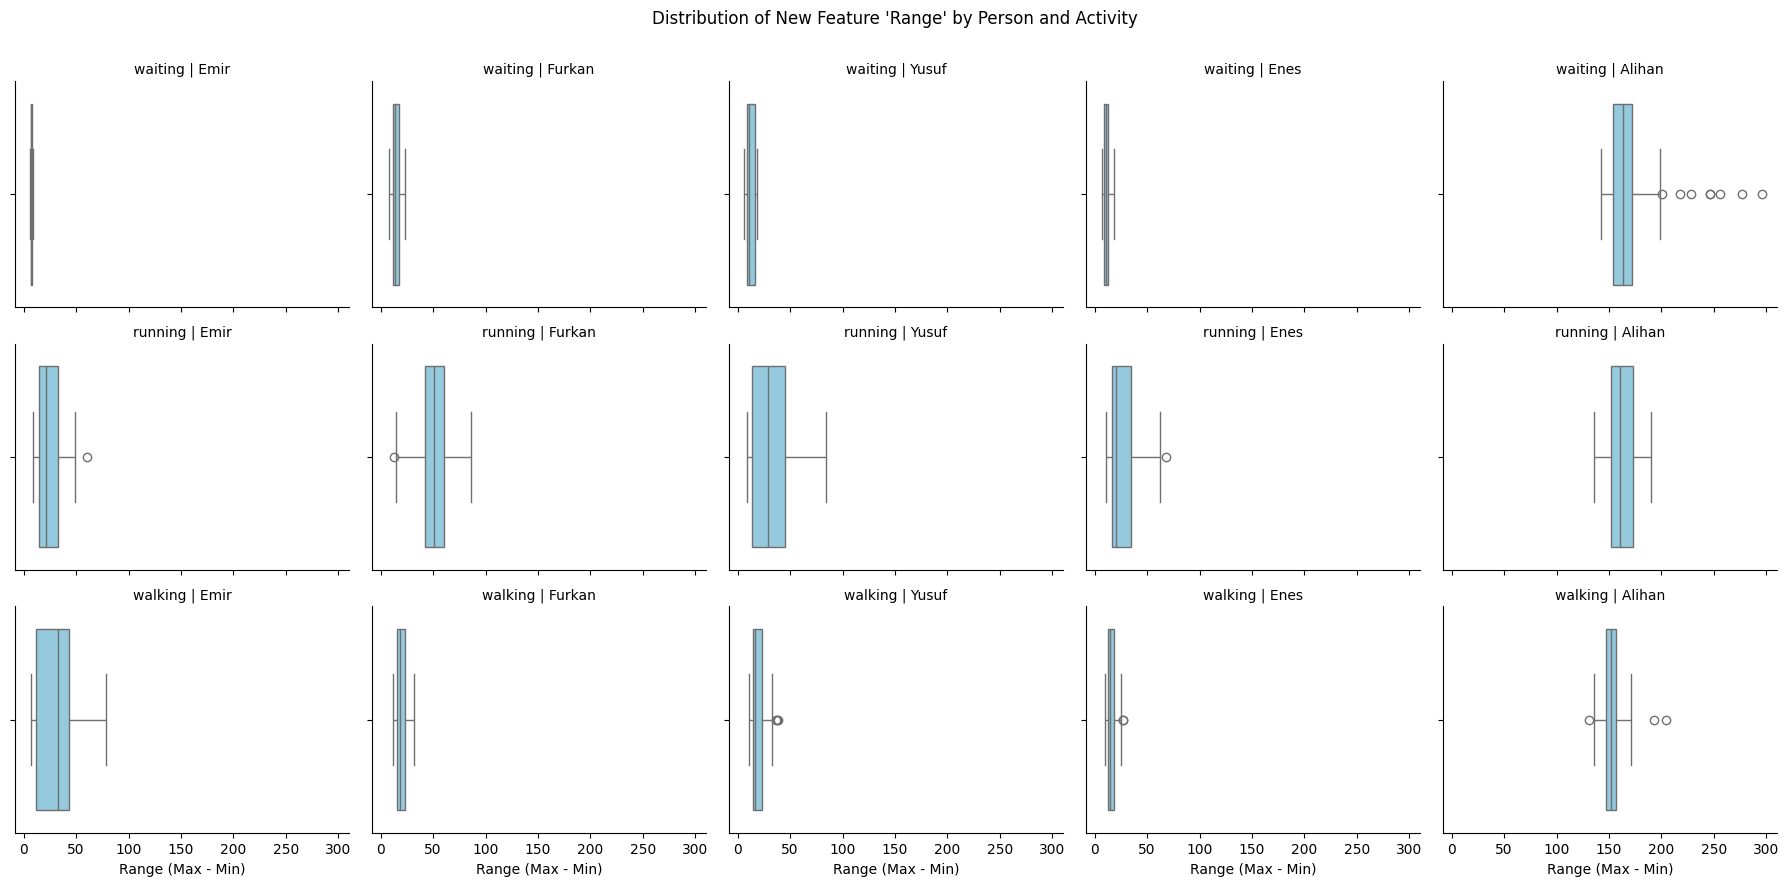

In [28]:

# A bar plot or a stacked bar plot showing the *count* of each 'activity' per 'name'
# is a much better way to visualize categorical distribution than the scatter plots.

# Calculate the counts of each activity for each person
activity_counts = train.groupby('name')['activity'].value_counts().unstack(fill_value=0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
activity_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribution of Activities Per Person (Training Set)')
ax.set_xlabel('Person (Name)')
ax.set_ylabel('Count of Sensor Readings')
ax.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize a single feature (like 'range') across all people and activities using box plots
# This shows if the new feature ('range') is useful for distinguishing activities.
grid_box = sns.FacetGrid(train, col='name', row='activity', height=3, aspect=1.2)
grid_box.map(sns.boxplot, 'range', orient='h', color='skyblue')
grid_box.set_titles(col_template="{col_name}", row_template="{row_name}")
grid_box.set_axis_labels("Range (Max - Min)", "")
plt.subplots_adjust(top=0.9)
grid_box.figure.suptitle("Distribution of New Feature 'Range' by Person and Activity")
plt.show()


PRELIMINARY PREDICTION (Decision Tree Classifier)
Features Used: ['max', 'min', 'mean', 'range', 'mean_to_range_ratio']
Training Accuracy: 1.0000 (Likely Overfit)

Feature Importance:
mean                   0.307098
max                    0.255455
mean_to_range_ratio    0.173559
range                  0.156796
min                    0.107092
dtype: float64


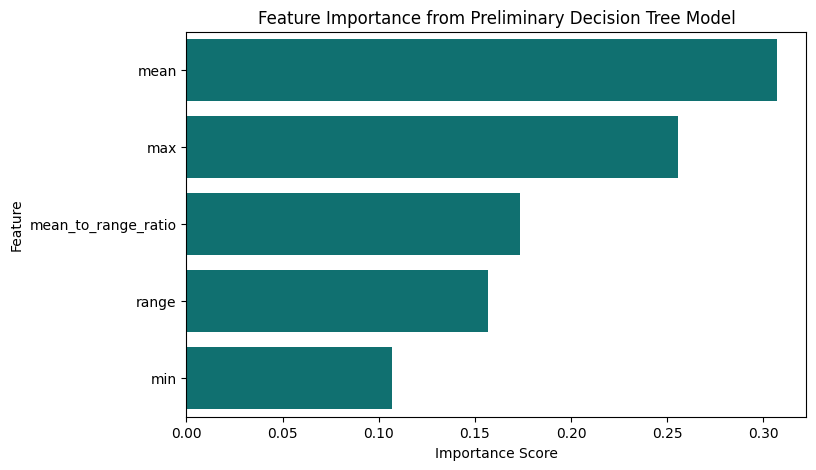

In [29]:
# ====================================================================
# --- 4) Preliminary Prediction (Classification) ---
# ====================================================================

# Goal: Predict 'activity' using the numerical features.

# Prepare the data for a simple model
X = train_processed.drop(['activity', 'name'], axis=1) # Features (numerical)
y = train_processed['activity'] # Target (categorical)

# For the preliminary prediction, we'll use a simple classifier: Decision Tree (good for quick insight)
dt_model = DecisionTreeClassifier(random_state=42)

# Perform a quick in-sample training (no cross-validation for speed)
# Note: For a real prediction, you'd use the separate 'test' set you created earlier.
dt_model.fit(X, y)

# Evaluate the model on the training data (a rough estimate of performance)
train_accuracy = dt_model.score(X, y)

print("\n" + "="*50)
print("PRELIMINARY PREDICTION (Decision Tree Classifier)")
print(f"Features Used: {list(X.columns)}")
print(f"Training Accuracy: {train_accuracy:.4f} (Likely Overfit)")

# Feature Importance Check (to see which features the model uses most)
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Optional: Visualize Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, color='teal')
plt.title('Feature Importance from Preliminary Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Titantic it 

In [32]:
# The 'activity' column (target) must be converted to numerical labels.
from sklearn.preprocessing import LabelEncoder

# Encode the categorical target variable 'activity'
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\n" + "="*50)
print("ACTIVITY ENCODING COMPLETE")
print(f"Original Activities: {le.classes_}")
print(f"Encoded Labels (0 to {len(le.classes_)-1}) applied to 'y_encoded'.")

# Drop the 'name' column as the problem stated it was inconsistent and we are modeling holistically.
# X was already created without 'activity' and 'name' in the prior step, but we ensure it here.
if 'name' in X.columns:
    X = X.drop('name', axis=1)

# X_train, X_test, y_train, y_test split is required for proper evaluation
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train_model.shape[0]}, Testing set size: {X_test_model.shape[0]}")



ACTIVITY ENCODING COMPLETE
Original Activities: ['running' 'waiting' 'walking']
Encoded Labels (0 to 2) applied to 'y_encoded'.
Training set size: 630, Testing set size: 270


In [33]:
# ====================================================================
# --- 1. MODEL, PREDICT, AND SOLVE (Extensive Model Evaluation) ---
# ====================================================================

# We will evaluate a wider range of models for multi-class classification.

classifiers = {
    "Logistic Regression (One-vs-Rest)": LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (LinearSVC)": LinearSVC(max_iter=10000, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
}

results = []
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train_model, y_train_model)
    
    # Evaluate on the test set
    test_score = model.score(X_test_model, y_test_model)
    
    results.append({'Model': name, 'Test Accuracy': round(test_score * 100, 2)})

# Compare model performance
model_results = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)

print("\n" + "="*50)
print("CLASSIFICATION MODEL COMPARISON (Test Set Accuracy)")
print(model_results)

C:\Users\azind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



CLASSIFICATION MODEL COMPARISON (Test Set Accuracy)
                                Model  Test Accuracy
3                       Random Forest          75.19
1                 K-Nearest Neighbors          73.70
2                       Decision Tree          71.48
5                Gaussian Naive Bayes          60.37
0   Logistic Regression (One-vs-Rest)          54.44
4  Support Vector Machine (LinearSVC)          47.78



ANALYSIS OF BEST MODEL: Random Forest


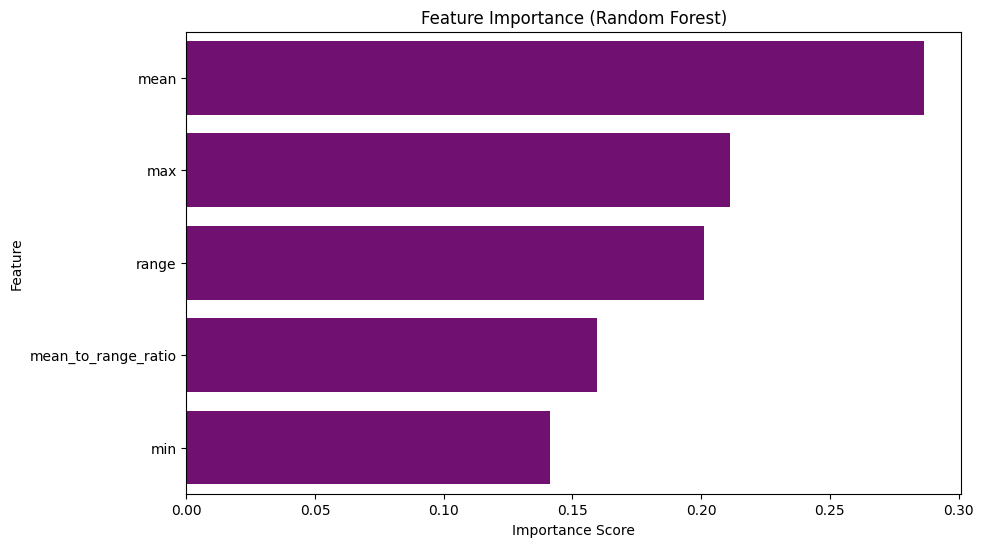

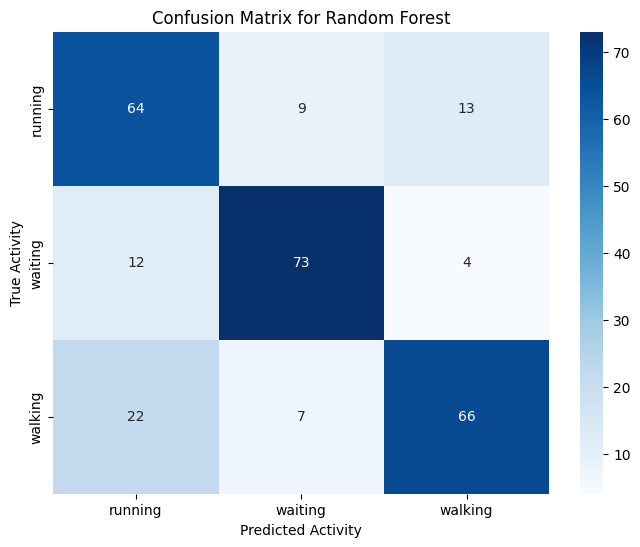


Classification Report (Test Data):
              precision    recall  f1-score   support

     running       0.65      0.74      0.70        86
     waiting       0.82      0.82      0.82        89
     walking       0.80      0.69      0.74        95

    accuracy                           0.75       270
   macro avg       0.76      0.75      0.75       270
weighted avg       0.76      0.75      0.75       270



In [34]:
# ====================================================================
# --- 2. VISUALIZE AND REPORT (Feature Importance & Confusion Matrix) ---
# ====================================================================

# Identify the best performing model (e.g., Random Forest)
best_model_name = model_results.iloc[0]['Model']
best_model = classifiers[best_model_name]

print("\n" + "="*50)
print(f"ANALYSIS OF BEST MODEL: {best_model_name}")

# A. Feature Importance (Applicable for Tree-Based Models like Random Forest/Decision Tree)
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X_train_model.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index, color='purple')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

# B. Confusion Matrix (Essential for Multi-Class Classification)
from sklearn.metrics import confusion_matrix, classification_report

y_pred_model = best_model.predict(X_test_model)
cm = confusion_matrix(y_test_model, y_pred_model)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.show()

# C. Classification Report (Detailed Metrics)
print("\nClassification Report (Test Data):")
print(classification_report(y_test_model, y_pred_model, target_names=le.classes_))